# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision

#### Tal Daniel

## Tutorial 05 - Deep Semantic Segmentation
---

<img src="./assets/tut_seg_anim.gif" style="height:200px">

* <a href="https://towardsdatascience.com/semantic-segmentation-with-deep-learning-a-guide-and-code-e52fc8958823">Image Source</a>

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [What is Semantic Segmentation?](#-Semantic-Segmentation)
* [Performance Metrics](#-Performance-Metrics)
* [Datasets for Semantic Segmentation](#-Datasets-for-Semantic-Segmentation)
* [Deep Semantic Segmentation](#-Deep-Learning-Methods-for-Semantic-Segmentation)
    * [Fully Convolutional Network (FCN)](#Fully-Convolutional-Network-(FCN))
    * [Pyramid Scene Parsing Network (PSPNet)](#Pyramid-Scene-Parsing-Network-(PSPNet))
    * [Mask R-CNN](#Mask-R-CNN)
    * [DeepLab (V2, V3, V3+)](#DeepLab-(V2,-V3,-V3+))
* [Example with DeepLab](#-DeepLab-Segmentation-Example-with-PyTorch)
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

In [1]:
# imports for the tutorial
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# pytorch
import torch
import torchvision
import torchvision.transforms as transforms

## <img src="https://img.icons8.com/color/96/000000/rubiks-cube.png" style="height:50px;display:inline"> Semantic Segmentation
---
* The task (sub-task of *scene understanding*) of **classifying each pixel of an image (or just several ones) into a category, where each category corresponds to a class**.
    * The categories can correspond to different parts of the image: road, sky, person, ...
* Classic Computer Vision (semantic) segmentation include simple heuristics as using color spaces, graph models (GraphCut, GrabCut), clustering methods (K-Means, Spectral Clustering) and the Watershed algorithm.
    * <a href="https://realpython.com/python-opencv-color-spaces/">Segmentation using Color Spaces Tutorial</a>
    * <a href="https://docs.opencv.org/master/d3/db4/tutorial_py_watershed.html">Watershed with OpenCV Tutorial</a>
    
<img src="./assets/tut_seg_semantic.png" style="height:200px">

* <a href="https://towardsdatascience.com/semantic-segmentation-the-easiest-possible-implementation-in-code-193bf27b86b8">Image Source</a>

## <img src="https://img.icons8.com/clouds/100/000000/performance-2.png" style="height:50px;display:inline"> Performance Metrics
---
* How can we tell if the *predicted* segmentation is good with respect to the *ground truth* (labeled) segmentation?
* Two popular evaluation metrics are the **intersection over union (IoU)** and **Average Precision (AP)**

### Intersection over Union (IoU)
---
* Also called the *Jaccard Index*.
* A value between 0 and 1. 
* It corresponds to the overlapping area between the predicted mask and the ground-truth mask. 
* The **higher** the IoU, the better the predicted location of the box for a given object.
* The segmentation challenge is evaluated using the **mean Intersection over Union (mIoU)** metric.
    * The mIoU is the average between the IoU of the segmented objects over all the images of the test dataset. $$ IoU = \frac{TP}{TP + FP+ FN} = \frac{\mid X \cap Y \mid}{\mid X \mid + \mid Y \mid - \mid X \cap Y \mid} $$
    * $X$ and $Y$ are the predicted and ground truth segmentation, respectively.
    * TP is the true positives, FP false positives and FN false negatives.

<img src="./assets/tut_seg_iou.png" style="height:200px">

* Image Source: Wikipedia

### Average Precision (AP)
---
* In binary classification, the Average Precision (AP) metric is a summary of the precision-recall curve.
* The **mean Average Precision (mAP)** is the mean of the Average Precisions computed over *all the classes* of the challenge.
* The mAP metric avoids to have extreme specialization in few classes and thus weak performances in others.
* Let $Q$ be the number of classes, $P$ denotes the precision ($P = \frac{TP}{TP+FP}$), and $AvgP(q)$ is the average precision of the $q^{th}$ category: $$mAP = \frac{\sum_{q=1}^Q AvgP(q)}{Q} $$

## <img src="https://img.icons8.com/bubbles/96/000000/pictures-folder.png" style="height:50px;display:inline"> Datasets for Semantic Segmentation
---
* **PASCAL Visual Object Classes (PASCAL VOC 2012)**
    * ~11k images compose the train and validation datasets while 10k images are dedicated to the test dataset.
    * 20 classes.
    * The main goal of this challenge is to recognize objects from a number of visual object classes in realistic scenes.
    * It is a supervised learning learning problem in that a training set of labeled images is provided.
    * The segmentation challenge is evaluated using the **mean Intersection over Union (mIoU)** metric.
    * <a href="http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html">Dataset Website</a>
    * In <a href="https://pytorch.org/docs/stable/torchvision/datasets.html#voc">PyTorch</a>: `torchvision.datasets.VOCSegmentation(root, year='2012', ...)`

<img src="./assets/tut_seg_pascal.PNG" style="height:300px">

* **PASCAL-Context (2014)**
    * An extension of the 2010 PASCAL VOC dataset. 
    * It contains ~10k images for training, 10k for validation and 10k for testing.
    * The entire scene is segmented providing more than 400 categories.
    * The official evaluation metric of the PASCAL-Context challenge is the **mIoU**.
    * <a href="https://cs.stanford.edu/~roozbeh/pascal-context/">Dataset Website</a>

<img src="./assets/tut_seg_pcontext.PNG" style="height:400px">

* **Common Objects in COntext (COCO, 2017-2018)**
    * There are two COCO challenges (in 2017 and 2018) for image semantic segmentation (*object detection* and *stuff segmentation*).
    * The *object detection* task consists in segmenting and categorizing objects into 80 categories. 
    * The *stuff segmentation* task uses data with large segmented part of the images (sky, wall, grass), they contain almost the entire visual information. 
    * It is composed of ~200k images with over 500k object instance segmented.
    * Both AP and IoU are used as evaluation metrics.
    * <a href="http://cocodataset.org/#home">Dataset Website</a>
    * In <a href="https://pytorch.org/docs/stable/torchvision/datasets.html#coco">PyTorch</a>: `torchvision.datasets.CocoDetection()`

<img src="./assets/tut_seg_coco.png" style="height:200px">

* **Cityscapes (2016)**
    * Contains complex segmented urban scenes from 50 cities.
    * It is composed of 23.5k images for training and validation and 1.5 images for testing from 29 categories.
    * It is known for its similarity with real urban scenes for autonomous driving applications. 
    * The performances measure is the mIoU metric.
    * <a href="https://www.cityscapes-dataset.com/">Dataset Website</a>
    * In <a href="https://pytorch.org/docs/stable/torchvision/datasets.html#cityscapes">PyTorch</a>: `torchvision.datasets.Cityscapes()`

<img src="./assets/tut_seg_cityscapes.PNG" style="height:200px">

## <img src="https://img.icons8.com/cotton/64/000000/magic-crystal-ball.png" style="height:50px;display:inline"> Deep Learning Methods for Semantic Segmentation
---
* With the increasing impact of deep learning on Computer Vision, it is no surprise that they can be utilized for the fundemental task of semantic segmentation.
* In this tutorial we will focus on the latest models and present the current state-of-the-art.

### Fully Convolutional Network (FCN)
---
* In 2015, the first <a href="https://people.eecs.berkeley.edu/~jonlong/long_shelhamer_fcn.pdf">Fully Convolutional Network (FCN)</a> (containing only convolutional layers) was developed and was trained end-to-end for image segmentation.
* The FCN takes an image with an *arbitrary size* (since there are only convolutions) and produces a segmented image in the same size.
* During the forward pass the network produces several feature maps with small sizes and dense representations, thus, an upsampling is necessary to create an output as the same size as the input.
    * Upsampling (Up-convolution/transposed-convolution, sometimes *mistakenly* called de-convolution) - a convolutional layer with a stride inferior to 1 (to create an output that is larger than the input).
    * Upsampling with a factor $f$ is a convolution with a fractional stride $\frac{1}{f}$.
* **Skip connections** in the network were added to combine high level feature map representations with more specific and dense ones at the top of the network. Increased the performance significantly.
* The network is trained using a pixel-wise loss (classification of each pixel). 

#### Up-Convolution / Transposed-Convolution
---
* Regular convolution, but the **input** is padded such that the output dimensions are higher.
* For example: a $2 \times 2$ input, with a $3 \times 3$ kernel (filter), is padded (fractional stride) as follows, such that the output dimensions are $5 \times 5$.

<img src="./assets/tut_seg_t_conv.gif" style="height:300px">

* <a href="https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d">Image Source</a>

<img src="./assets/tut_seg_fcn.PNG" style="height:200px">

Results: **62.2%** mIoU score on the 2012 PASCAL VOC segmentation challenge using pretrained models on the 2012 ImageNet dataset. 

### Pyramid Scene Parsing Network (PSPNet)
---
* In 2016, the <a href="https://arxiv.org/pdf/1612.01105.pdf">Pyramid Scene Parsing Network (PSPNet)</a> was developed to better learn the global context representation of a scene.
* Patterns are extracted from the input image using a feature extractor (pre-trained ResNet) with a dilated network strategy.
    * **Dilated network strategy** - a convolutional layer with expanded filter (the weights of the filter have space between them). A dilatation rate fixes the gap between two neurons in terms of pixel (how many pixels between neurons).
* The feature maps are then serve as input to a *Pyramid Pooling Module* to distinguish patterns at different scales.
* Each scale corresponds to a level in the Pyramid, The features are pooled before each level to match the level's scale.
    * This way, each pyramid level work on sub-regions of the image at different locations.

* At each level, a 1x1 convolutional layer reduces the dimensions of the scaled features.
    * **1x1 convolution** - channel-wise pooling, often called feature map pooling or a projection layer. This simple technique can be used for dimensionality reduction, decreasing the number of feature maps whilst retaining their salient features. <a href="https://machinelearningmastery.com/introduction-to-1x1-convolutions-to-reduce-the-complexity-of-convolutional-neural-networks/">Tutorial on 1x1 convolutions</a>.
* The outputs of the pyramid levels are upsampled and *concatenated* to the initial feature maps to finally contain the local and the global context information.
* Finally, they are processed by a convolutional layer to generate the pixel-wise predictions.
* The loss is the classification loss (of pixels) and auxilary loss on the features.

<img src="./assets/tut_seg_pspnet.PNG" style="height:250px">

Results: The best PSPNet with a pretrained ResNet has reached a **85.4%** mIoU score on the 2012 PASCAL VOC segmentation challenge.

### Mask R-CNN
---
* In 2017, the <a href="https://arxiv.org/pdf/1703.06870.pdf">Mask R-CNN</a> model was developed, beating all previous benchmarks on many COCO challenges.
* It builds upon the *Faster R-CNN* (2015) architecture for object detection that uses a **Region Proposal Network (RPN)** to propose bounding box candidates. 
* The RPN extracts **Region of Interest (RoI)** and a RoIPool layer computes features from these proposals in order to infer the *bounding box cordinates* and the *class* of the object. 

* Mask R-CNN adds a third output branch: the first one computes the bounding box coordinates, the second one computes the associated class and the last one computes the binary mask.
* The binary mask has a *fixed* size and it is generated by a FCN for a given RoI.
* The particularity of the Mask R-CNN model is its **multi-task loss** combining the losses of the bounding box coordinates, the predicted class and the segmentation mask. 
    * The model tries to solve complementary tasks leading to better performances on each individual task. 

<img src="./assets/tut_seg_maskrcnn.PNG" style="height:250px">

Results: The best Mask R-CNN uses a ResNeXt (2016) to extract features and a Feature Pyramid Network (FPN) architecture. It has obtained a **37.1%** AP score on the 2016 COCO segmentation challenge and a **41.8%** AP score on the 2017 COCO segmentation challenge.

### <img src="https://img.icons8.com/cotton/64/000000/olympic-torch.png" style="height:50px;display:inline"> R-CNN Family Implementations
---
* R-CNN, Fast R-CNN, Faster R-CNN and even Mask R-CNN are all implemented in **Detectron2 for PyTorch**.
    * It is better to use Faster R-CNN or Mask R-CNN (if you need segmentation).
* <a href="https://github.com/facebookresearch/detectron2">Detectron2 for PyTorch</a>
    * <a href="https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5">Colab Notebook Demo of Detectron2</a>
    
<img src="./assets/tut_objdet_detectron.png" style="height:300px">

### DeepLab (V2, V3, V3+)
---
* In 2017, <a href="https://arxiv.org/pdf/1606.00915.pdf">DeepLabv2</a> was introduced (V1 and V2 share similar properties which were inspired by the FCN model).
* The state-of-the-art model makes 3 new contributions: atrous convolution (upsampled filters), atrous spatial pyramid pooling (ASPP) and a fully connected Conditional Random Field (CRF).
* **Atrous convolution** - basically the dilated convolution from earlier, allows to control the resolution at which feature responses are computed within deep CNNs.
    * This effectively enlarges the field of view of filters to incorporate larger context *without* increasing the number of parameters or the amount of computation (it increases the resolution of the final output without increasing the number of weights.)
    * For example, if the rate of the convolution is equal to 2, the filter targets one pixel over two in the input. If the rate equal to 1, the atrous convolution is a basic convolution. 

* Atrous convolution: (top-regular convolution, bottom-atrous convolution) <img src="./assets/tut_seg_atrous.PNG" style="height:400px">

<img src="./assets/tut_seg_atrous_2.PNG" style="height:300px">

<img src="./assets/tut_seg_atrous_anim.gif" style="height:300px">

* <a href="https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d">Image Source</a>

* **Atrous spatial pyramid pooling (ASPP)** - allows to segment objects at multiple scales.
    * Applying several atrous convolution of the *same* input at different rates to detect spatial patterns. 
    * The features maps are processed on separate branches and concatenated using bilinear interpolation to recover the original size of the input.

<img src="./assets/tut_seg_aspp.PNG" style="height:250px">

* **Conditional Random Field (CRF)** - the output of the final layer in the deep CNN goes through a fully connected CRF which is effectively computing edges between the features and long term dependencies to produce the semantic segmentation.
    * The combination of max-pooling and downsampling in deep CNNs achieves invariance but has a toll on localization accuracy, thus the use if CRF is effective.
    * <a href="https://medium.com/ml2vec/overview-of-conditional-random-fields-68a2a20fa541">CRFs</a> are a discriminative model, used for predicting sequences. They use contextual information from previous labels, thus increasing the amount of information the model has in order to make a good prediction. 

<img src="./assets/tut_seg_deeplab2.PNG" style="height:250px">

Results: DeepLab V2 using a ResNet-101 as backbone has reached a **79.7%** mIoU score on the 2012 PASCAL VOC challenge, a **45.7%** mIoU score on the PASCAL-Context challenge and a **70.4%** mIoU score on the Cityscapes challenge.

#### DeepLabV3
---
* Shortly after DeepLabV2 was released, <a href="https://arxiv.org/pdf/1706.05587.pdf">DeepLabv3</a> modified the architecture to combine cascaded and parallel modules of atrous convolutions.
    * The ResNet architecture was modified to keep high resolution feature maps in deep blocks using atrous convolutions.
* The *parallel* atrous convolution modules are grouped in the Atrous Spatial Pyramid Pooling (ASPP), like in V2, but with added 1x1 convolutions and batch normalization.
* DeepLabV3 **removed** the CRF module.
* All the outputs are concatenated and processed by another 1x1 convolution to create the final output with logits for each pixel.

* Cascaded

<img src="./assets/tut_seg_deeplab3.PNG" style="height:300px">

* Parallel <img src="./assets/tut_seg_deeplab3_aspp.PNG" style="height:250px">
* Results: the best DeepLabv3 model with a pretrained ResNet-101 has reached **86.9%** mIoU score in the 2012 PASCAL VOC challenge. It also achieved a **81.3%** mIoU score on the Cityscapes challenge.

#### DeepLabV3+
---
* In 2018, Google released the latest improvement to DeepLab, <a href="https://arxiv.org/pdf/1802.02611.pdf">DeepLabV3+</a> which embraced an **encoder-decoder structure**.
* **Atrous separable convolution** was introduced, which is composed of a depthwise convolution (spatial convolution for each channel of the input) and pointwise convolution (1x1 convolution with the depthwise convolution as input).
    * It performs a spatial convolution independently for each input channel, while the pointwise convolution is employed to combine the output from the depthwise convolution

* Atrous separable convolution <img src="./assets/tut_seg_depthwise_conv.PNG" style="height:250px">

<img src="./assets/tut_seg_deeplab3plus.PNG" style="height:300px">

Results: the best DeepLabv3+ has obtained a **89.0%** mIoU score on the 2012 PASCAL VOC challenge. The model trained on the Cityscapes dataset has reached a **82.1%** mIoU score for the associated challenge.

#### Results Summary
---
<img src="./assets/tut_seg_restable.png" style="height:400px">

## <img src="https://img.icons8.com/bubbles/50/000000/fire-element.png" style="height:50px;display:inline"> DeepLab Segmentation Example with PyTorch
---
* We will now show how to load a pre-trained DeepLabV3 and perform segementation with Pytorch.
* Note that on the <a href="https://pytorch.org/hub/">PyTorch Hub</a> there are many pre-trained models for all sorts of tasks.
* If you want to use other pre-trained models, GitHub is the place to look!
    * For example, if you want to use **DeepLabV3+** (which is not available on the PyTorch hub), you can download a pre-trained model from <a href="https://github.com/jfzhang95/pytorch-deeplab-xception">here</a>.

# ------------------------- <img src="https://img.icons8.com/color/96/000000/code.png" style="height:50px;display:inline"> CODE TIME -------------------------

In [2]:
# download and load the pre-trained model
model = torch.hub.load('pytorch/vision:v0.5.0', 'deeplabv3_resnet101', pretrained=True)
# put in inference mode
model.eval();

Using cache found in C:\Users\tabad/.cache\torch\hub\pytorch_vision_v0.5.0


* All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape $(N, 3, H, W)$, where $N$ is the number of images, $H$ and $W$ are expected to be at least 224 pixels. 
* The images have to be loaded in to a range of $[0, 1]$ and then normalized using mean = $[0.485, 0.456, 0.406]$ and std = $[0.229, 0.224, 0.225]$.
* The model returns an `OrderedDict` with two Tensors that are of the same height and width as the input Tensor, but with 21 classes. 
* `output['out']` contains the semantic masks, and `output['aux']` contains the auxillary loss values per-pixel. 
* In inference mode, `output['aux']` is not useful. So, `output['out']` is of shape $(N, 21, H, W)$.

In [3]:
# define device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# load an image
filename = "./assets/tut_seg_dog.jpg"
# filename = "./assets/kofiko.jpg"
input_image = Image.open(filename)

# define the pre-processing steps
# image->tensor, normalization
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# perform pre-processing
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch of size 1 as expected by the model

# send to device
model = model.to(device)
input_batch = input_batch.to(device)

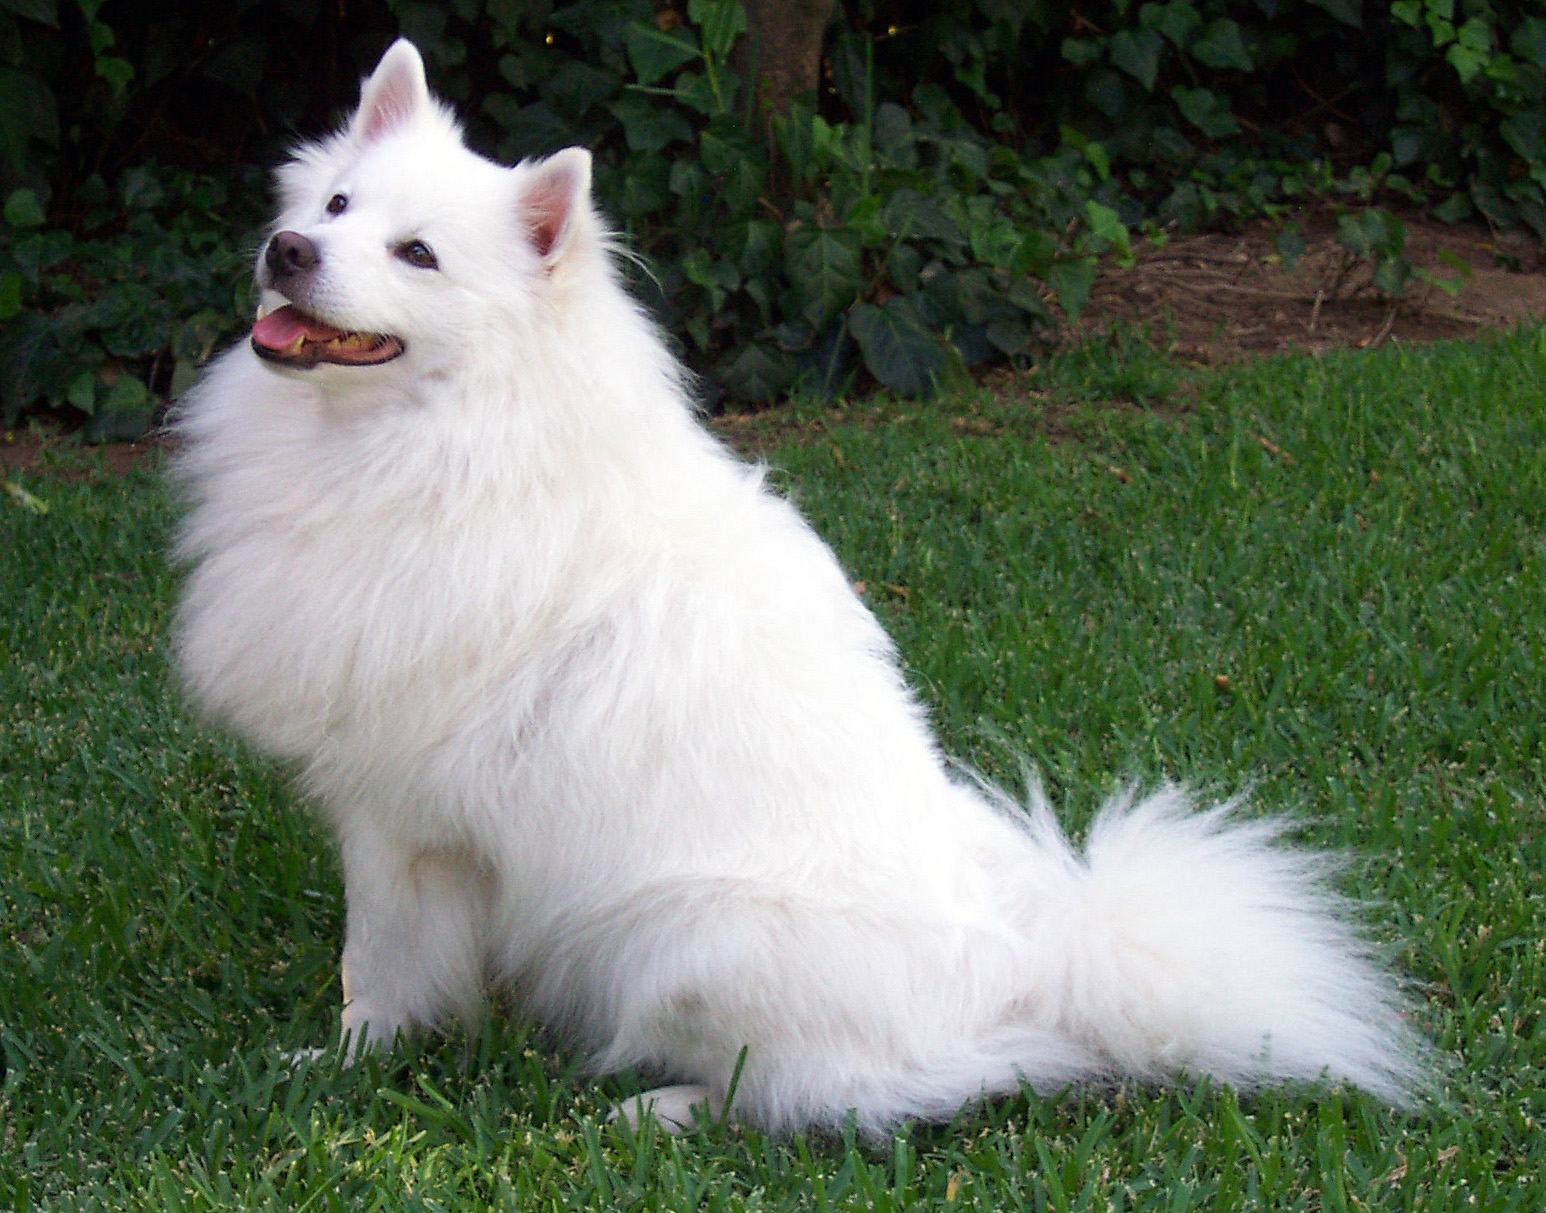

In [4]:
input_image

In [5]:
# forward pass
with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)
print("output shape: ", output.shape)
print("output_predictions shape: ", output_predictions.shape)

output shape:  torch.Size([21, 1213, 1546])
output_predictions shape:  torch.Size([1213, 1546])


* The output here is of shape $(21, H, W)$, and at each location, there are unnormalized proababilities corresponding to the prediction of each class.
* To get the maximum prediction of each class, and then use it for a downstream task, you can do `output_predictions = output.argmax(0)`.

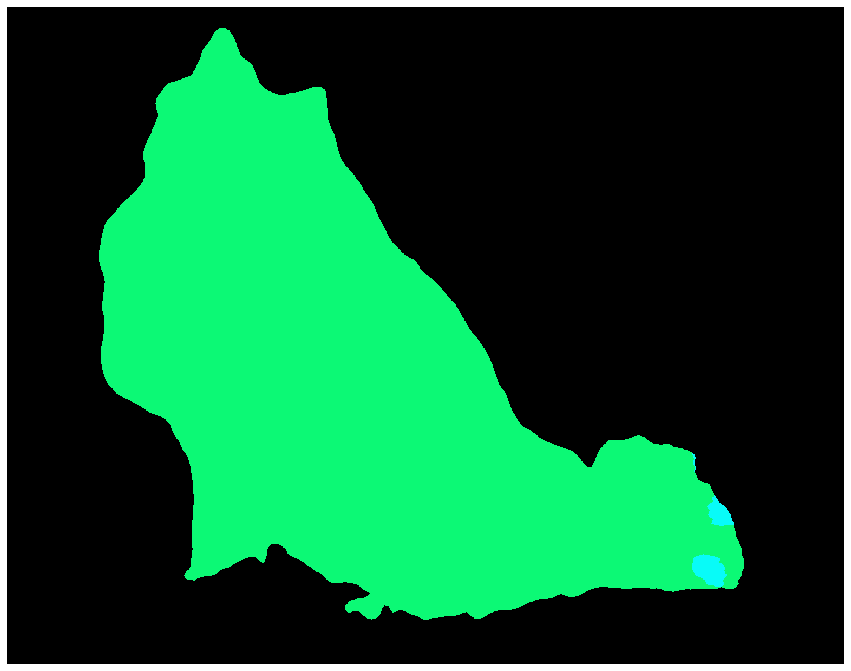

In [6]:
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

# plot
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(r)
ax.set_axis_off()

In [7]:
labels = ['aeroplane',  'bicycle', 'bird',  'boat',      'bottle', 
          'bus',        'car',      'cat',  'chair',     'cow',
          'diningtable','dog',    'horse',  'motorbike', 'person',
          'pottedplant','sheep',  'sofa',   'train',   'tvmonitor']
print(["{}: {}".format(i + 1, labels[i]) for i in range(len(labels))])

['1: aeroplane', '2: bicycle', '3: bird', '4: boat', '5: bottle', '6: bus', '7: car', '8: cat', '9: chair', '10: cow', '11: diningtable', '12: dog', '13: horse', '14: motorbike', '15: person', '16: pottedplant', '17: sheep', '18: sofa', '19: train', '20: tvmonitor']


In [8]:
# what labels were recognized?
np.unique(output_predictions.cpu().numpy())

array([ 0,  8, 12], dtype=int64)

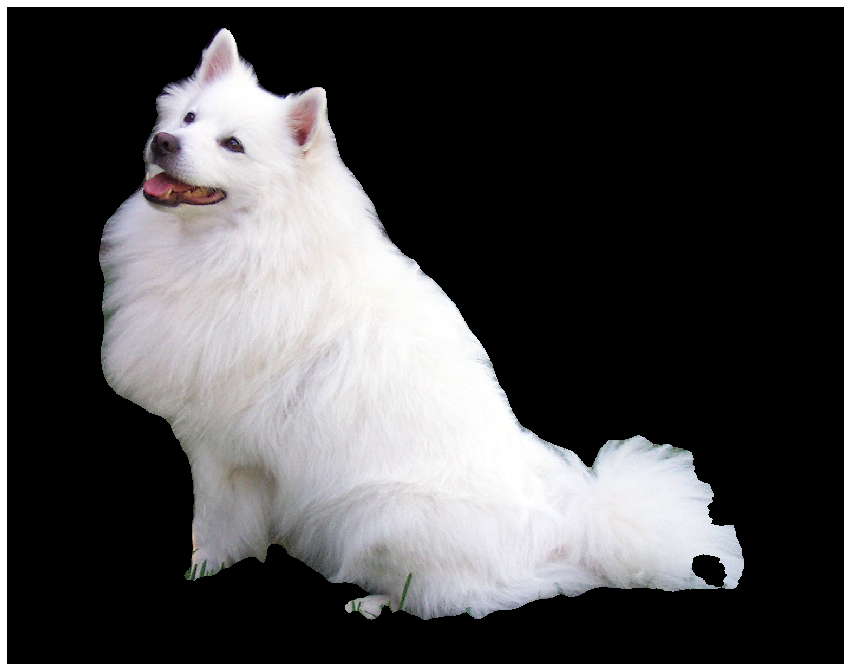

In [10]:
# create a mask
mask = torch.zeros_like(output_predictions).float().to(device)
mask[output_predictions == 12] = 1 # 12 is dog
# mask[output_predictions == 15] = 1 # 15 is person
masked_img = input_image * mask.unsqueeze(2).byte().cpu().numpy()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(masked_img)
ax.set_axis_off()

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject
* (Deep) Semantic Segmentation - <a href="https://www.youtube.com/watch?v=nDPWywWRIRo"> Stanford CS231 - Lecture 11 | Detection and Segmentation</a>
* Condtional Random Fields -  <a href="https://www.youtube.com/watch?v=rc3YDj5GiVM"> Conditional Random Fields - Stanford University (By Daphne Koller)</a>
* DeepLabV2 - <a href="https://www.youtube.com/watch?v=b6jhopSMit8"> DeepLab: Semantic Image Segmentation (How it works) </a>

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Deep Semantic Segmentation of Natural and Medical Images: A Review - Taghanaki et al., 2019
* Review of Deep Learning Algorithms for Image Semantic Segmentation - <a href="https://medium.com/@arthur_ouaknine/review-of-deep-learning-algorithms-for-image-semantic-segmentation-509a600f7b57">Arthur Ouaknine</a>
* Semantic Segmentation with Deep Learning - <a href="https://towardsdatascience.com/semantic-segmentation-with-deep-learning-a-guide-and-code-e52fc8958823">George Seif</a>
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com